<a href="https://colab.research.google.com/github/yrodriguezmd/IceVision_in_the_works/blob/main/IV_sci5_kni5_savingcsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
!bash install_colab.sh

In [1]:
from icevision.all import *

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:70
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

In [ ]:
import icevision
print('icevision v',icevision.__version__)
print('torch v',torch.__version__)
print('torchvision v',torchvision.__version__)

icevision v 0.9.0a1
torch v 1.8.0+cu101
torchvision v 0.9.0+cu101


In [2]:
#option 1: git clone
!git clone https://github.com/yrodriguezmd/scissors5_knife5.git 
# initially run with no File9, later added

#option 2:
#colab upload

Cloning into 'scissors5_knife5'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 26 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [ ]:
!ls

'=5.1'	       install_colab.sh   scissors5_knife5
 checkpoints   sample_data	  scissors5_knife5_


In [ ]:
!ls scissors5_knife5/images

File10.JPG  File2.jpg  File4.jpg  File6.jpg  File8.jpg
File1.jpg   File3.jpg  File5.jpg  File7.jpg  File9.jpg


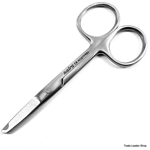

In [3]:
image_path = Path('scissors5_knife5/images')
## images better in a folder
img_files = get_image_files(image_path)

img = PIL.Image.open(img_files[9])
img = img.convert('RGB')

img.to_thumb(150,150)

In [4]:
# using model pretrained on coco
CLASSES = ('person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
               'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
               'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
               'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
               'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
               'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
               'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
               'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
               'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
               'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
               'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
               'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
               'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
               'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush')
class_map = ClassMap(CLASSES)
len(class_map)
# 80 + background

81

In [5]:
from icevision.models.checkpoint import *

In [6]:
selection = 0

extra_args = {}

if selection == 0:
  model_type = models.mmdet.retinanet
  backbone = model_type.backbones.resnet50_fpn_1x

elif selection == 1:
  # The Retinanet model is also implemented in the torchvision library
  model_type = models.torchvision.retinanet
  backbone = model_type.backbones.resnet50_fpn

elif selection == 2:
  model_type = models.ross.efficientdet
  backbone = model_type.backbones.tf_lite0
  # The efficientdet model requires an img_size parameter
  extra_args['img_size'] = image_size

elif selection == 3:
  model_type = models.ultralytics.yolov5
  backbone = model_type.backbones.small
  # The yolov5 model requires an img_size parameter
  extra_args['img_size'] = image_size

model_type, backbone, extra_args

(<module 'icevision.models.mmdet.models.retinanet' from '/usr/local/lib/python3.7/dist-packages/icevision/models/mmdet/models/retinanet/__init__.py'>,
 {})

In [7]:
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(class_map), **extra_args) 


  0%|          | 0/152149505 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/utils/weight_init.py:119: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  'init_cfg without layer key, if you do not define override'


Use load_from_local loader


In [ ]:
backbone.__dict__

# filename diff on website, file down/uploaded
#retinanet_r50_caffe_fpn_1x_coco_20200531-f11027c5.pth

{'config_path': Path('/root/.icevision/mmdetection_configs/mmdetection_configs-2.10.0/configs/retinanet/retinanet_r50_fpn_1x_coco.py'),
 'model_name': 'retinanet',
 'pretrained': True,
 'weights_url': 'http://download.openmmlab.com/mmdetection/v2.0/retinanet/retinanet_r50_fpn_1x_coco/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth'}

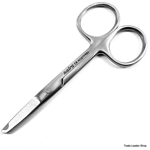

In [8]:
image_path = Path('scissors5_knife5/images')
## images better in a folder
img_files = get_image_files(image_path)

img = PIL.Image.open(img_files[9])
img = img.convert('RGB')

img.to_thumb(150,150)

In [9]:
model.eval()

imgs_array = [PIL.Image.open(file) for file in img_files]

imgs_array = [image.convert('RGB') for image in imgs_array]##

img_size = 384 #460
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])
## when A.Normalize commented out, images weirded out

infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map = class_map)##

In [10]:
len(imgs_array)
## 10 images in Dataset

10

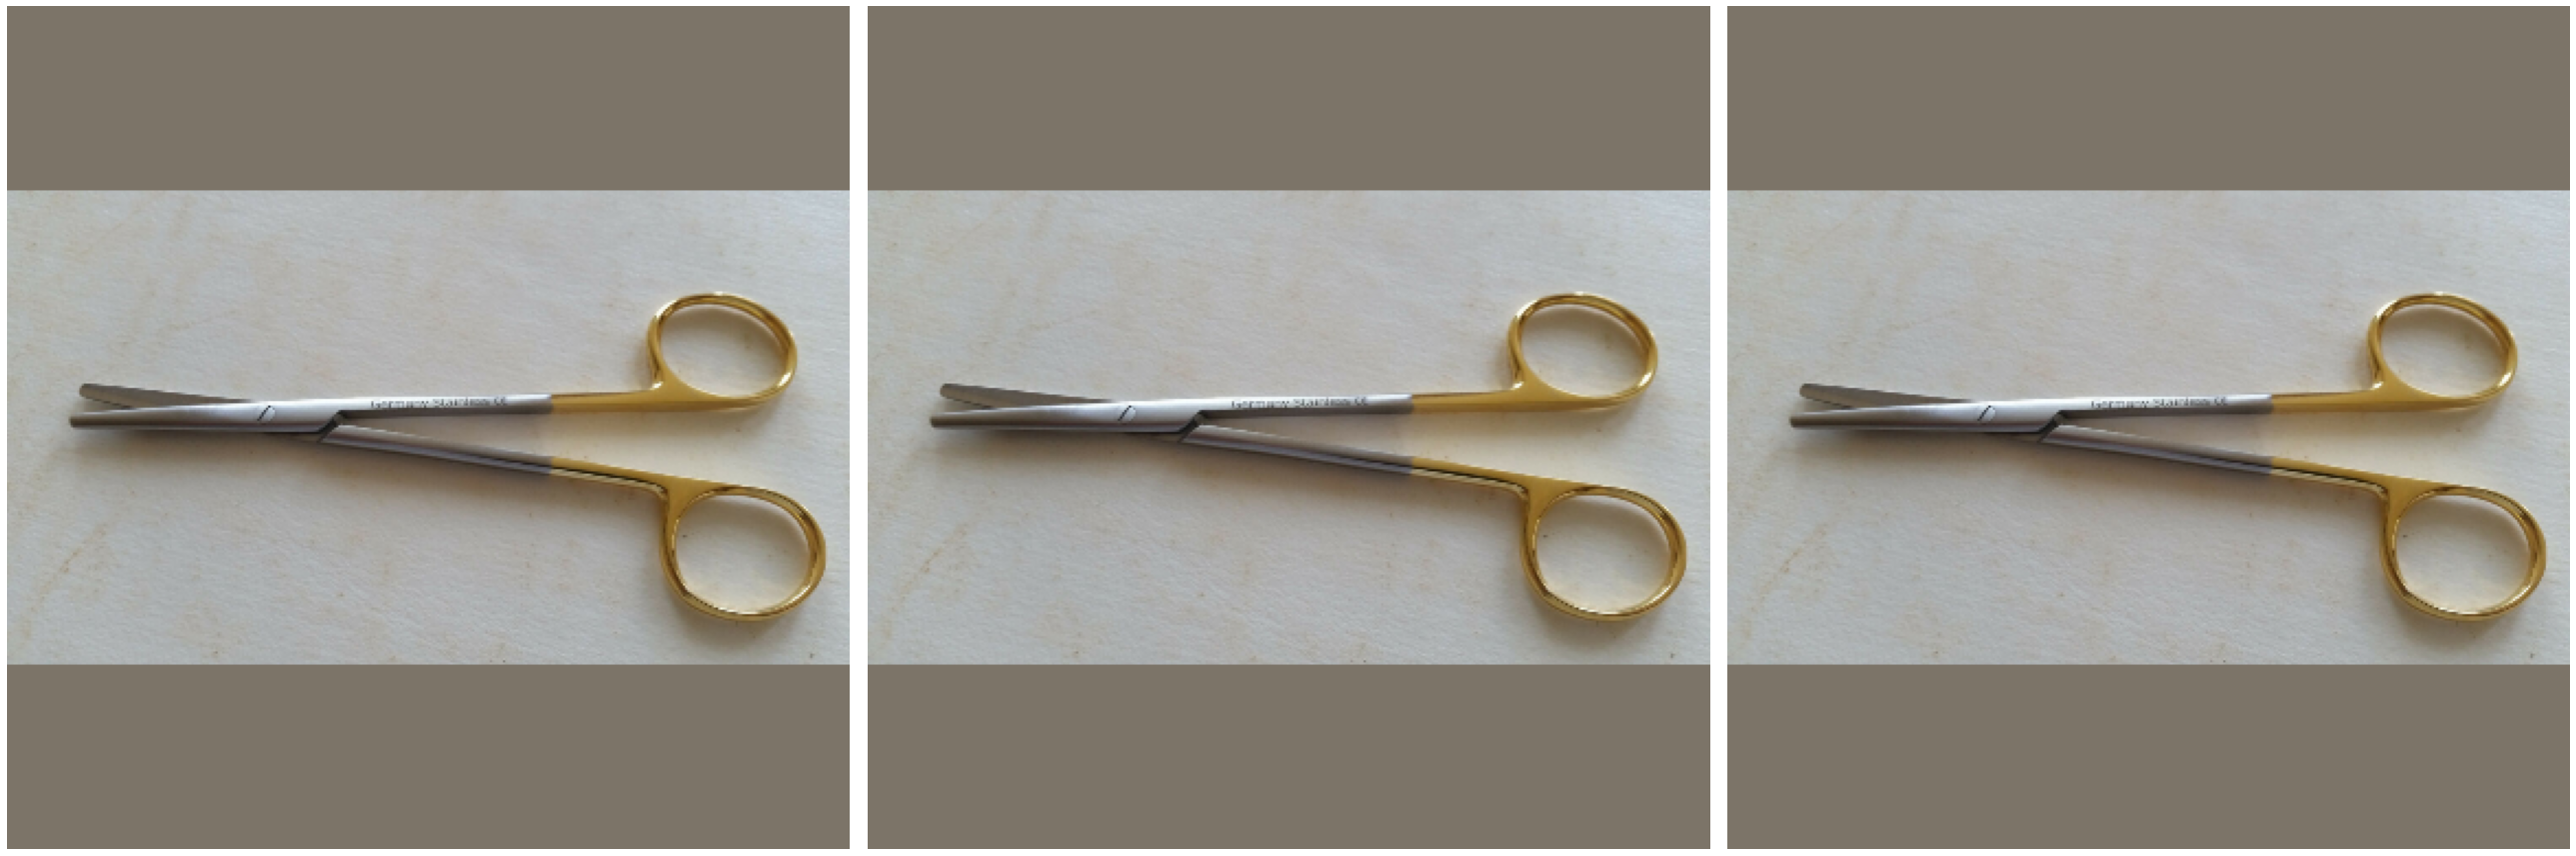

In [11]:
samples = [infer_ds[8] for _ in range(3)]
show_samples(samples, denormalize_fn = denormalize_imagenet, ncols=3)

In [12]:
## Files 1-8 and 10 (figure out shape problem generated by File9)
infer_dl = model_type.infer_dl(infer_ds) #, batch_size=4, shuffle=False)

preds_saved = model_type.predict_from_dl(model, infer_dl, keep_images=True)

## ValueError: operands could not be broadcast together with shapes (384,384) (3,) (384,384) 

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
preds_saved

In [ ]:
# with File 9 converted to RGB
show_preds(preds_saved, font_size=30)

In [59]:
preds_saved[9].pred.as_dict

<bound method BaseRecord.as_dict of BaseRecord

common: 
	- Record ID: 9
	- Img: 384x384x3 <np.ndarray> Image
	- Image size ImgSize(width=384, height=384)
detection: 
	- Scores: [    0.74269]
	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tennis racket': 39, 'bottle': 40, 'wine glass': 41, 'cup': 42, 'fork': 43, 'knife': 44, 'spoon': 45, 'bowl': 46, 'banana': 47, 'apple': 48, 'sandwich': 49, 'orange': 50, 'broccoli': 51, 'carrot': 52, 'hot 

In [60]:
preds_saved[9].pred.aggregate_objects

<bound method BaseRecord.aggregate_objects of BaseRecord

common: 
	- Record ID: 9
	- Img: 384x384x3 <np.ndarray> Image
	- Image size ImgSize(width=384, height=384)
detection: 
	- Scores: [    0.74269]
	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tennis racket': 39, 'bottle': 40, 'wine glass': 41, 'cup': 42, 'fork': 43, 'knife': 44, 'spoon': 45, 'bowl': 46, 'banana': 47, 'apple': 48, 'sandwich': 49, 'orange': 50, 'broccoli': 51, 'carrot':

In [65]:
preds_saved[9].pred.unload

<bound method BaseRecord.unload of BaseRecord

common: 
	- Record ID: 9
	- Img: None
	- Image size ImgSize(width=384, height=384)
detection: 
	- Scores: [    0.74269]
	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tennis racket': 39, 'bottle': 40, 'wine glass': 41, 'cup': 42, 'fork': 43, 'knife': 44, 'spoon': 45, 'bowl': 46, 'banana': 47, 'apple': 48, 'sandwich': 49, 'orange': 50, 'broccoli': 51, 'carrot': 52, 'hot dog': 53, 'pizza': 54, 'd

In [66]:
preds_saved[9].pred.__repr__

<bound method BaseRecord.__repr__ of BaseRecord

common: 
	- Record ID: 9
	- Img: None
	- Image size ImgSize(width=384, height=384)
detection: 
	- Scores: [    0.74269]
	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tennis racket': 39, 'bottle': 40, 'wine glass': 41, 'cup': 42, 'fork': 43, 'knife': 44, 'spoon': 45, 'bowl': 46, 'banana': 47, 'apple': 48, 'sandwich': 49, 'orange': 50, 'broccoli': 51, 'carrot': 52, 'hot dog': 53, 'pizza': 54, 

In [ ]:
preds_saved[9].pred.common

In [ ]:
preds_saved[9].pred

BaseRecord

common: 
	- Record ID: 9
	- Img: 384x384x3 <np.ndarray> Image
	- Image size ImgSize(width=384, height=384)
detection: 
	- Scores: [    0.74269]
	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tennis racket': 39, 'bottle': 40, 'wine glass': 41, 'cup': 42, 'fork': 43, 'knife': 44, 'spoon': 45, 'bowl': 46, 'banana': 47, 'apple': 48, 'sandwich': 49, 'orange': 50, 'broccoli': 51, 'carrot': 52, 'hot dog': 53, 'pizza': 54, 'donut': 55, 

In [ ]:
import pandas as pd
df = pd.DataFrame(preds_saved)
df

In [ ]:
for _ in range(len(preds_saved)):
  print(preds_saved[_].pred)

In [73]:
for _ in range(len(preds_saved)):
  print(preds_saved[_].pred.common.record_id)

0
1
2
3
4
5
6
7
8
9


In [94]:
csv =[]
for _ in range(len(preds_saved)):
  rec = preds_saved[_].pred.common.record_id
  csv.append(rec)
  
df1 = pd.DataFrame(csv, columns = ['record_id'])
df1
## figure out how to place image filename

,record_id
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [90]:
csv_size = []
for _ in range(len(preds_saved)):
  size = preds_saved[_].pred.common.img_size
  csv_size.append(size)
df2 = pd.DataFrame(csv_size)

In [93]:
df1.merge(df2, left_index=True, right_index=True)

,record_id,width,height
0,0,384,384
1,1,384,384
2,2,384,384
3,3,384,384
4,4,384,384
5,5,384,384
6,6,384,384
7,7,384,384
8,8,384,384
9,9,384,384


In [ ]:
for _ in range(len(preds_saved)):
  print(preds_saved[_].pred.detection.bboxes)

[]
[<BBox (xmin:49.3341064453125, ymin:97.97958374023438, xmax:318.367431640625, ymax:240.14508056640625)>, <BBox (xmin:18.595291137695312, ymin:129.56948852539062, xmax:291.96270751953125, ymax:287.2333679199219)>]
[]
[<BBox (xmin:71.59517669677734, ymin:77.58869934082031, xmax:199.77194213867188, ymax:315.3489990234375)>]
[]
[]
[]
[<BBox (xmin:51.31748962402344, ymin:39.31889343261719, xmax:315.7509765625, ymax:344.27581787109375)>, <BBox (xmin:51.31748962402344, ymin:39.31889343261719, xmax:315.7509765625, ymax:344.27581787109375)>]
[<BBox (xmin:37.14222717285156, ymin:163.9459991455078, xmax:379.21588134765625, ymax:280.799560546875)>]
[<BBox (xmin:13.125701904296875, ymin:8.169326782226562, xmax:371.7850646972656, ymax:343.802978515625)>]


In [72]:
for _ in range(len(preds_saved)):
    print(preds_saved[_].pred.detection.labels)
    ## auto ID (instead of int)

[]
['scissors', 'scissors']
[]
['knife']
[]
[]
[]
['knife', 'scissors']
['scissors']
['scissors']


In [ ]:
for _ in range(len(preds_saved)):
    print(preds_saved[_].pred.detection.scores)

[]
[     0.8464       0.845]
[]
[    0.57827]
[]
[]
[]
[    0.52265     0.53145]
[    0.69667]
[    0.74269]


In [46]:
csv = []
for _ in range(len(preds_saved)):
  #csv = []
  row = preds_saved[_].pred
  csv.append(row)
print(csv)  

## figure out how to separate each component 
## place into columns

[BaseRecord

common: 
	- Record ID: 0
	- Image size ImgSize(width=384, height=384)
	- Img: 384x384x3 <np.ndarray> Image
detection: 
	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tennis racket': 39, 'bottle': 40, 'wine glass': 41, 'cup': 42, 'fork': 43, 'knife': 44, 'spoon': 45, 'bowl': 46, 'banana': 47, 'apple': 48, 'sandwich': 49, 'orange': 50, 'broccoli': 51, 'carrot': 52, 'hot dog': 53, 'pizza': 54, 'donut': 55, 'cake': 56, 'chair': 57,

In [42]:
df = pd.DataFrame(csv, columns = ['Record ID:'])
df

,Record ID:
0,"BaseRecord\n\ncommon: \n\t- Record ID: 0\n\t- Image size ImgSize(width=384, height=384)\n\t- Img: 384x384x3 <np.ndarray> Image\ndetection: \n\t- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'fri..."
1,"BaseRecord\n\ncommon: \n\t- Record ID: 1\n\t- Image size ImgSize(width=384, height=384)\n\t- Img: 384x384x3 <np.ndarray> Image\ndetection: \n\t- BBoxes: [<BBox (xmin:49.3341064453125, ymin:97.97958374023438, xmax:318.367431640625, ymax:240.14508056640625)>, <BBox (xmin:18.595291137695312, ymin:129.56948852539062, xmax:291.96270751953125, ymax:287.2333679199219)>]\n\t- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking mete..."
2,"BaseRecord\n\ncommon: \n\t- Image size ImgSize(width=384, height=384)\n\t- Img: 384x384x3 <np.ndarray> Image\n\t- Record ID: 2\ndetection: \n\t- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'fri..."
3,"BaseRecord\n\ncommon: \n\t- Image size ImgSize(width=384, height=384)\n\t- Img: 384x384x3 <np.ndarray> Image\n\t- Record ID: 3\ndetection: \n\t- Scores: [ 0.57827]\n\t- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie..."
4,"BaseRecord\n\ncommon: \n\t- Img: 384x384x3 <np.ndarray> Image\n\t- Record ID: 4\n\t- Image size ImgSize(width=384, height=384)\ndetection: \n\t- Scores: []\n\t- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'sui..."
5,"BaseRecord\n\ncommon: \n\t- Image size ImgSize(width=384, height=384)\n\t- Img: 384x384x3 <np.ndarray> Image\n\t- Record ID: 5\ndetection: \n\t- BBoxes: []\n\t- Scores: []\n\t- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27,..."
6,"BaseRecord\n\ncommon: \n\t- Record ID: 6\n\t- Img: 384x384x3 <np.ndarray> Image\n\t- Image size ImgSize(width=384, height=384)\ndetection: \n\t- Scores: []\n\t- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop si

In [ ]:
df = pd.DataFrame(csv)
df

,0
0,"BaseRecord\n\ncommon: \n\t- Record ID: 0\n\t- Image size ImgSize(width=384, height=384)\n\t- Img: 384x384x3 <np.ndarray> Image\ndetection: \n\t- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'fri..."
1,"BaseRecord\n\ncommon: \n\t- Record ID: 1\n\t- Image size ImgSize(width=384, height=384)\n\t- Img: 384x384x3 <np.ndarray> Image\ndetection: \n\t- BBoxes: [<BBox (xmin:49.3341064453125, ymin:97.97958374023438, xmax:318.367431640625, ymax:240.14508056640625)>, <BBox (xmin:18.595291137695312, ymin:129.56948852539062, xmax:291.96270751953125, ymax:287.2333679199219)>]\n\t- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking mete..."
2,"BaseRecord\n\ncommon: \n\t- Image size ImgSize(width=384, height=384)\n\t- Img: 384x384x3 <np.ndarray> Image\n\t- Record ID: 2\ndetection: \n\t- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'fri..."
3,"BaseRecord\n\ncommon: \n\t- Image size ImgSize(width=384, height=384)\n\t- Img: 384x384x3 <np.ndarray> Image\n\t- Record ID: 3\ndetection: \n\t- Scores: [ 0.57827]\n\t- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie..."
4,"BaseRecord\n\ncommon: \n\t- Img: 384x384x3 <np.ndarray> Image\n\t- Record ID: 4\n\t- Image size ImgSize(width=384, height=384)\ndetection: \n\t- Scores: []\n\t- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'sui..."
5,"BaseRecord\n\ncommon: \n\t- Image size ImgSize(width=384, height=384)\n\t- Img: 384x384x3 <np.ndarray> Image\n\t- Record ID: 5\ndetection: \n\t- BBoxes: []\n\t- Scores: []\n\t- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27,..."
6,"BaseRecord\n\ncommon: \n\t- Record ID: 6\n\t- Img: 384x384x3 <np.ndarray> Image\n\t- Image size ImgSize(width=384, height=384)\ndetection: \n\t- Scores: []\n\t- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 

In [ ]:
pd.DataFrame()

In [ ]:
checkpoint_path = '/content/retinanet_r50_caffe_fpn_1x_coco_20200531-f11027c5.pth'

checkpoint_and_model = model_from_checkpoint(checkpoint_path)

##TypeError: argument of type 'NoneType' is not iterable

created new pilot set total of 

10 different scissors and scissor-like instruments

10 scalpels, including just holders and blades

included multiple objects in an image

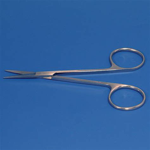

In [ ]:
image_path = 'for_pilot_10_10'

img_files = get_image_files(image_path)

img = PIL.Image.open(img_files[1])
img.to_thumb(150,150)

In [ ]:
model.eval()

image_path = 'for_pilot_10_10'

img_files = get_image_files(image_path)

imgs_array = [PIL.Image.open(file) for file in img_files]

img_size = 460
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map = class_map)

In [ ]:
imgs_array

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x305 at 0x7F33ED9A2DD0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x474 at 0x7F33ED9A2950>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x308 at 0x7F33ED9A2B90>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x355 at 0x7F33ED9D8890>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x355 at 0x7F33ED9A7A90>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x176 at 0x7F33ED9A7110>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x155 at 0x7F33ED9A7210>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x355 at 0x7F33ED9A7C50>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x474 at 0x7F33ED9E68D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x474 at 0x7F33ED9E6C10>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=452x378 at 0x7F33ED978250>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x232 at 0x7F33ED9

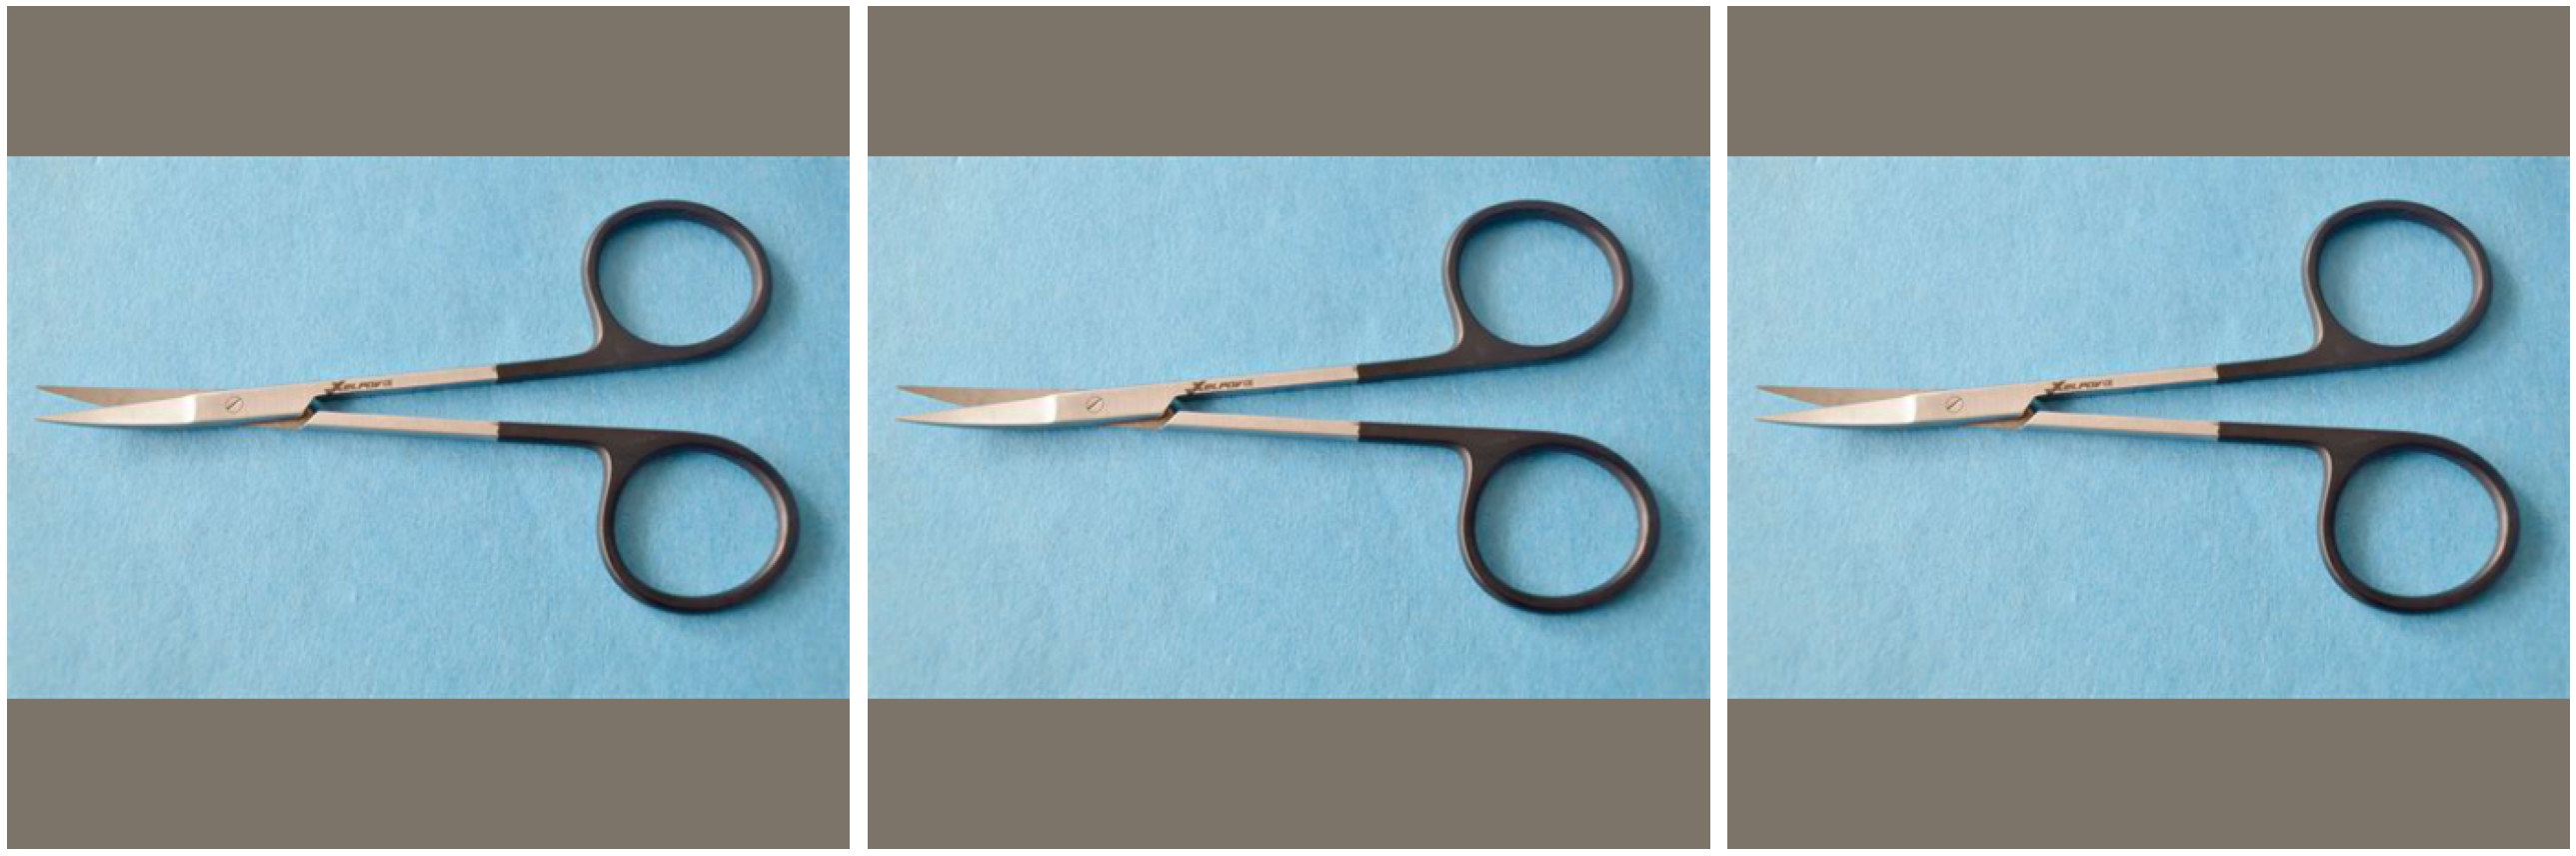

In [ ]:
samples = [infer_ds[0] for _ in range(3)]
show_samples(samples, denormalize_fn = denormalize_imagenet, ncols=3)

In [ ]:
infer_dl = model_type.infer_dl(infer_ds, batch_size=4, shuffle=False)

preds_saved = model_type.predict_from_dl(model, infer_dl, keep_images=True)

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
preds_saved

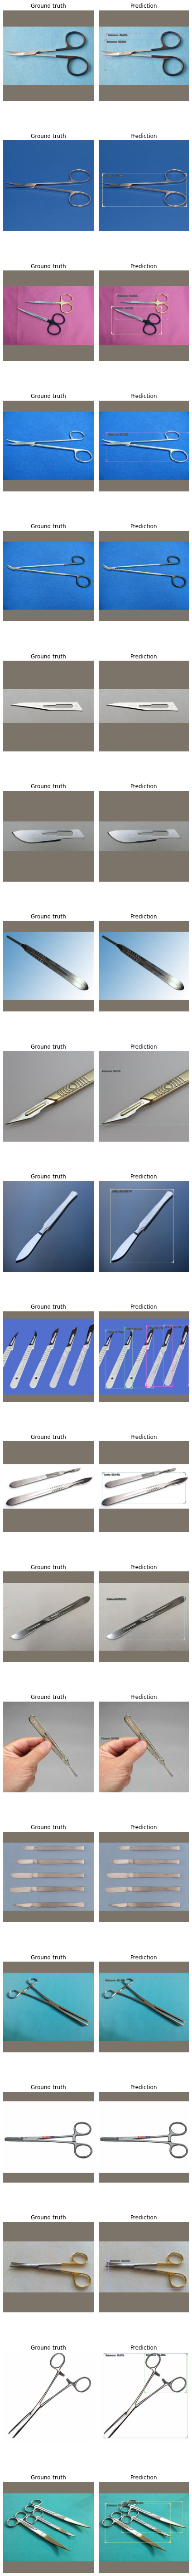

In [ ]:
show_preds(preds_saved)

In [ ]:
## predicts scissors well
## flase positive scissor prediction for clamps
## difficulty predicitng potts scissors

## difficulty predicting multiple knives, as well as separates

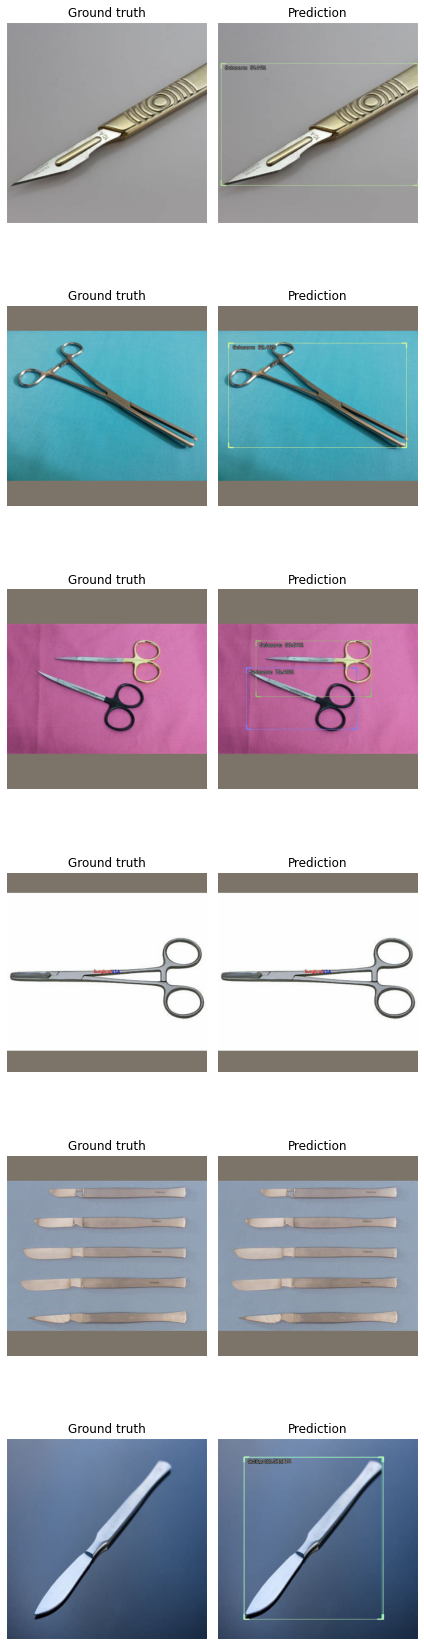

In [ ]:
model_type.show_results(model, infer_ds, detection_threshold=0.5)

In [ ]:
preds_saved[0].pred

BaseRecord

common: 
	- Image size ImgSize(width=460, height=460)
	- Img: 460x460x3 <np.ndarray> Image
	- Record ID: 0
detection: 
	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tennis racket': 39, 'bottle': 40, 'wine glass': 41, 'cup': 42, 'fork': 43, 'knife': 44, 'spoon': 45, 'bowl': 46, 'banana': 47, 'apple': 48, 'sandwich': 49, 'orange': 50, 'broccoli': 51, 'carrot': 52, 'hot dog': 53, 'pizza': 54, 'donut': 55, 'cake': 56, 'chair': 57, 

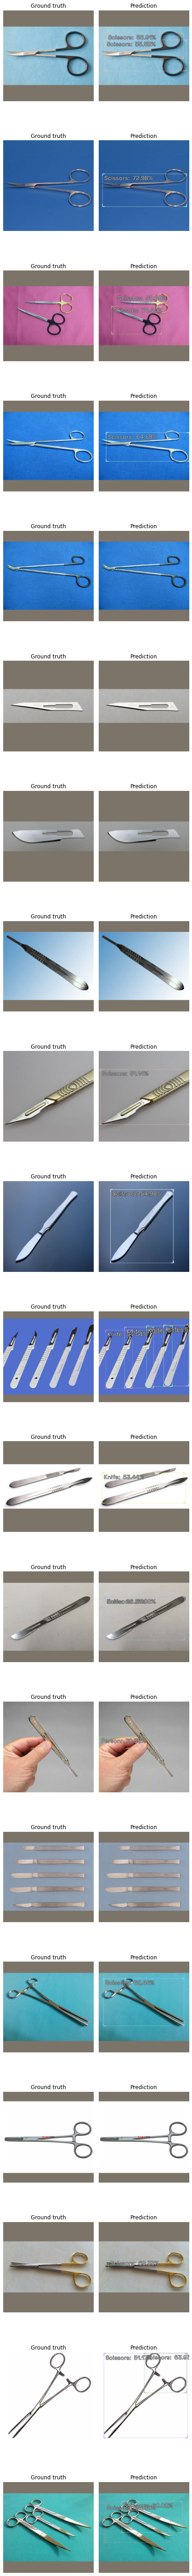

In [ ]:
show_preds(preds_saved, font_size=30)
## need better labelling